# Introduction - Architecture, Model Inputs & Outputs

Attention is all you need paper introduced the transformers architecture. It was used for language translation tasks.
It consisted of an Encoder and Decoder.

Input to the Encoder is the text in the original language

Input to the Decoder are 2 fold:
1. Encoder features
2. masked text/words of the 2nd langauage

There are also transformer-based models that only use the encoder part (good for tasks that require understanding of the input, such as classification), or only the decoder part (good for tasks such as text generation). 

An example of an encoder-only model is BERT; an example of a decoder-only model is GPT2.

https://huggingface.co/datasets/huggingface-course/audio-course-images/resolve/main/transformers_blocks.png

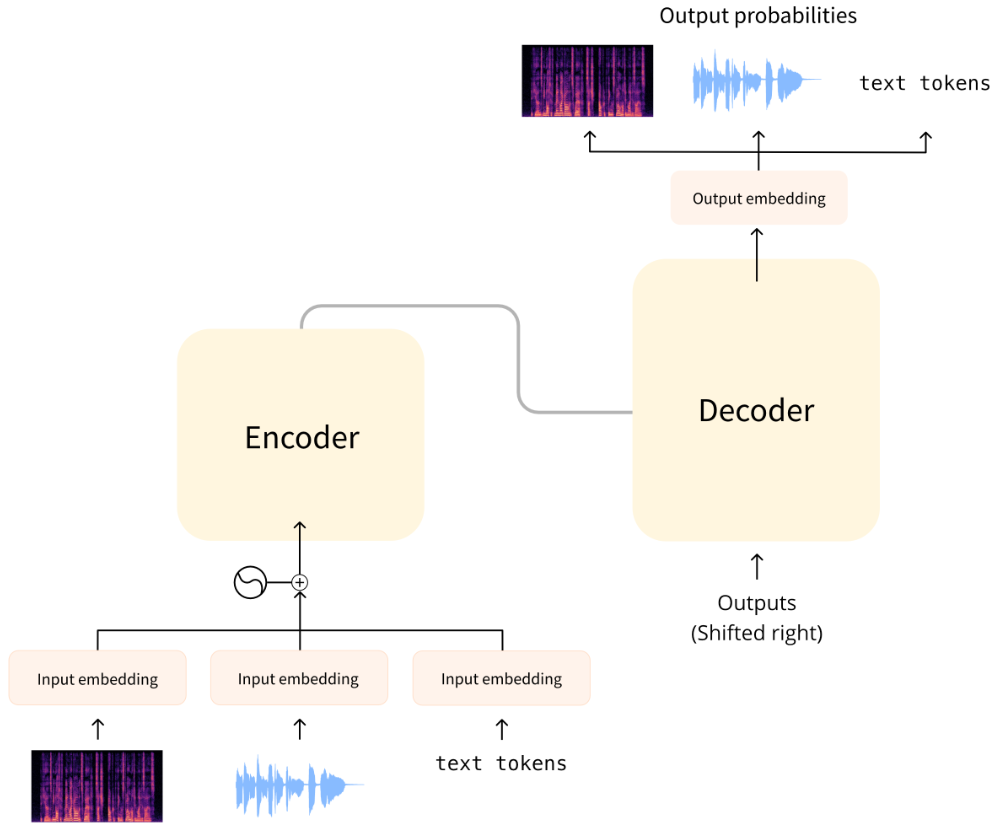

For audio tasks, the input and/or output sequences may be audio instead of text:

1. Automatic speech recognition (ASR): The input is speech, the output is text.

2. Speech synthesis (TTS): The input is text, the output is speech.

3. Audio classification: The input is audio, the output is a class probability — one for each element in the sequence or a single class probability for the entire sequence.

4. Voice conversion or speech enhancement: Both the input and output are audio.



There are a few different ways to handle audio so it can be used with a transformer. The main consideration is whether to use the audio in its raw form — as a waveform — or to process it as a spectrogram instead.

## Model inputs
The input to an audio model can be either text or sound. The goal is to convert this input into an embedding vector that can be processed by the transformer architecture.

#### Text input
A text-to-speech model takes text as input. This works just like the original transformer or any other NLP model: The input text is first tokenized, giving a sequence of text tokens. This sequence is sent through an input embedding layer to convert the tokens into 512-dimensional vectors. Those embedding vectors are then passed into the transformer encoder.

#### Waveform input
An automatic speech recognition model takes audio as input. To be able to use a transformer for ASR, we first need to convert the audio into a sequence of embedding vectors somehow.

Models such as Wav2Vec2 and HuBERT use the audio waveform directly as the input to the model. As you’ve seen in the chapter on audio data, a waveform is a one-dimensional sequence of floating-point numbers, where each number represents the sampled amplitude at a given time. This raw waveform is first normalized to zero mean and unit variance, which helps to standardize audio samples across different volumes (amplitudes).

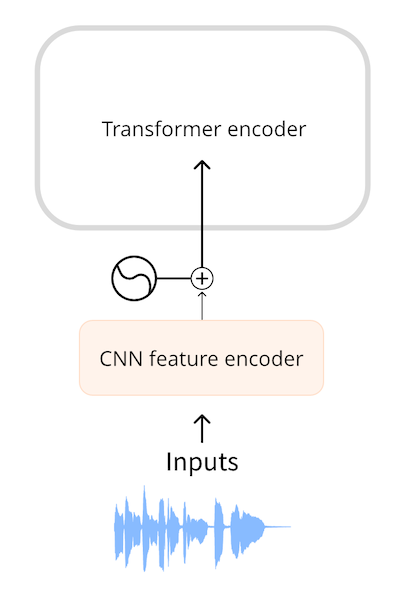

After normalizing, the sequence of audio samples is turned into an embedding using a small convolutional neural network, known as the feature encoder. Each of the convolutional layers in this network processes the input sequence, subsampling the audio to reduce the sequence length, until the final convolutional layer outputs a 512-dimensional vector with the embedding for each 25 ms of audio. Once the input sequence has been transformed into a sequence of such embeddings, the transformer will process the data as usual.

#### Spectrogram input

One downside of using the raw waveform as input is that they tend to have long sequence lengths. For example, thirty seconds of audio at a sampling rate of 16 kHz gives an input of length 30 * 16000 = 480000. Longer sequence lengths require more computations in the transformer model, and so higher memory usage.

Because of this, raw audio waveforms are not usually the most efficient form of representing an audio input. By using a spectrogram, we get the same amount of information but in a more compressed form.

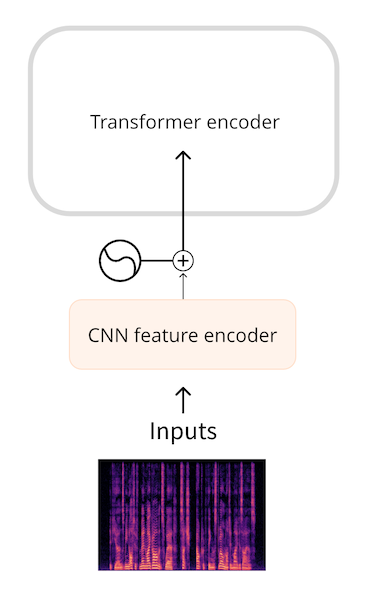

Models such as Whisper first convert the waveform into a log-mel spectrogram. Whisper always splits the audio into 30-second segments, and the log-mel spectrogram for each segment has shape (80, 3000) where 80 is the number of mel bins and 3000 is the sequence length. By converting to a log-mel spectrogram we’ve reduced the amount of input data, but more importantly, this is a much shorter sequence than the raw waveform. The log-mel spectrogram is then processed by a small CNN into a sequence of embeddings, which goes into the transformer as usual.

In both cases, waveform as well as spectrogram input, there is a small network in front of the transformer that converts the input into embeddings and then the transformer takes over to do its thing.

------------------------

## Model outputs

The transformer architecture outputs a sequence of hidden-state vectors, also known as the output embeddings. Our goal is to transform these vectors into a text or audio output.

#### ASR Output
The goal of an automatic speech recognition model is to predict a sequence of text tokens. This is done by adding a language modeling head — typically a single linear layer — followed by a softmax on top of the transformer’s output. This predicts the probabilities over the text tokens in the vocabulary.

### Spectrogram Output
For models that generate audio, such as a text-to-speech (TTS) model, we’ll have to add layers that can produce an audio sequence. It’s very common to generate a spectrogram and then use an additional neural network, known as a vocoder, to turn this spectrogram into a waveform.

In the SpeechT5 TTS model, for example, the output from the transformer network is a sequence of 768-element vectors. A linear layer projects that sequence into a log-mel spectrogram. A so-called post-net, made up of additional linear and convolutional layers, refines the spectrogram by reducing noise. The vocoder then makes the final audio waveform.

#### Note:
 If you take an existing waveform and apply the Short-Time Fourier Transform or STFT, it is possible to perform the inverse operation, the ISTFT, to get the original waveform again. This works because the spectrogram created by the STFT contains both amplitude and phase information, and both are needed to reconstruct the waveform. However, audio models that generate their output as a spectrogram typically only predict the amplitude information, not the phase. To turn such a spectrogram into a waveform, we have to somehow estimate the phase information. That's what a vocoder does.

### Waveform Output
It’s also possible for models to directly output a waveform instead of a spectrogram as an intermediate step.
But most models skip this step since spectrogram to waveform is a complex task and best left to separate model/Neural Net.